In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [11]:
%matplotlib inline 

In [3]:
df = pd.read_excel('recommendation_results.xlsx', index_col=0, sheet_name='Sheet1') 

In [8]:
subset = df[(df['num_iters'] == 10)].sort_values(['rank', 'lambda'])

In [9]:
subset

,rank,num_iters,lambda,model_fit_time,rmse_val,rmse_val_rt,rmse_test,rmse_test_rt,map,precision_100,precision_300,precision_500,ndcg_100,ndcg_300,ndcg_500,metrics_eval_rt
sample,,,,,,,,,,,,,,,,
1,10,10,0.01,NaN,0.920002,44.558833,0.920002,78.148314,0.000326,0.000571,0.000429,0.000329,0.002920,0.005301,0.006370,40.379185
1,10,10,0.05,NaN,0.840436,72.244687,0.840436,77.630217,0.000179,0.000286,0.000190,0.000179,0.001778,0.002730,0.003723,38.239185
1,10,10,0.10,NaN,0.828763,48.377265,0.828763,42.449144,0.000289,0.000179,0.000286,0.000236,0.001150,0.003905,0.004837,35.937332
1,10,10,0.20,NaN,0.855343,46.979971,0.855343,18.018096,0.000161,0.000286,0.000238,0.000207,0.001459,0.003205,0.004267,37.676775
1,30,10,0.01,NaN,0.982672,67.190749,0.982672,128.284726,0.000298,0.000464,0.000298,0.000250,0.002578,0.004050,0.005318,50.359871
1,30,10,0.05,NaN,0.837071,31.815100,0.837071,108.137505,0.000309,0.000464,0.000357,0.000321,0.002345,0.004580,0.006059,57.619507
1,30,10,0.10,NaN,0.823542,55.358165,0.823542,130.948113,0.000320,0.000429,0.000333,0.000321,0.002332,0.004182,0.006058,50.868374
1,30,10,0.20,NaN,0.853105,75.420548,0.853105,106.447164,0.000248,0.000286,0.000321,0.000329,0.001524,0.004043,0.006075,49.663973
1,50,10,0.01,656.968141,0.997983,81.038292,0.999230,33.858935,0.000190,0.000250,0.000345,0.000343,0.001205,0.004054,0.005994,64.471207


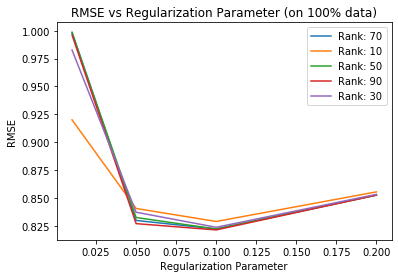

In [66]:
# plt.figure(figsize=(13,10))
for rank in list(set(subset['rank'].values)):
    plt.plot(subset[subset['rank'] == rank]['lambda'].values, subset[subset['rank'] == rank]['rmse_val'].values, label = f"Rank: {rank}")

plt.legend(prop={'size': 10})

plt.title('RMSE vs Regularization Parameter (on 100% data)')
plt.xlabel('Regularization Parameter')
plt.ylabel('RMSE')

# RMSE vs Regularization Parameter

plt.savefig('RMSE_vs_RegParam.png', dpi=192, bbox_inches = "tight")



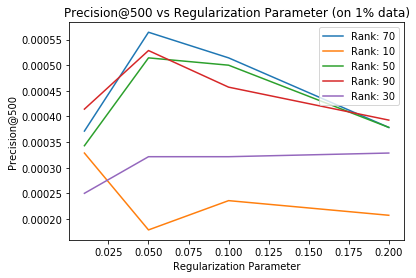

In [65]:
# plt.figure(figsize=(13,10))
for rank in list(set(subset['rank'].values)):
    plt.plot(subset[subset['rank'] == rank]['lambda'].values, subset[subset['rank'] == rank]['precision_500'].values, label = f"Rank: {rank}")

plt.legend(prop={'size': 10})

plt.title('Precision@500 vs Regularization Parameter (on 1% data)')
plt.xlabel('Regularization Parameter')
plt.ylabel('Precision@500')

# RMSE vs Regularization Parameter

plt.savefig('Precision500_vs_RegParam.png', dpi=192, bbox_inches = "tight")



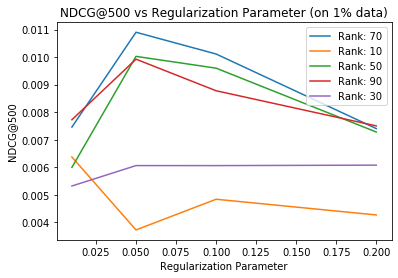

In [64]:
# plt.figure(figsize=(13,10))
for rank in list(set(subset['rank'].values)):
    plt.plot(subset[subset['rank'] == rank]['lambda'].values, subset[subset['rank'] == rank]['ndcg_500'].values, label = f"Rank: {rank}")

plt.legend(prop={'size': 10})

plt.title('NDCG@500 vs Regularization Parameter (on 1% data)')
plt.xlabel('Regularization Parameter')
plt.ylabel('NDCG@500')

# RMSE vs Regularization Parameter

plt.savefig('NDCG500_vs_RegParam.png', dpi=192, bbox_inches = "tight")



In [30]:

# Runtimes on Spark

'''
Data Size, Run time
0.01, 10.365 # TODO
0.02, 5.512
0.05, 11.559
0.1, 40 # TODO
(0.25, 452),
(0.5, 325),
(1, 826)
'''

'\nData Size, Run time\n0.01, 1.15 # TODO\n0.02, 5.512\n0.05, 11.559\n0.1, 40 # TODO\n'

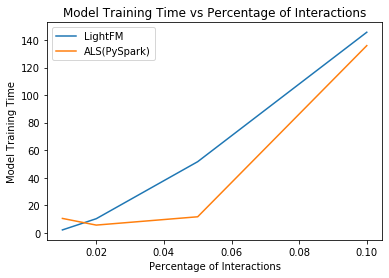

In [63]:
light_fm = [
    (0.01, 2.005218744277954),
    (0.02, 10.149718284606934),
    (0.05, 51.627174854278564),
    (0.1, 145.73897552490234),
]

pyspark = [
    (0.01, 10.365),
    (0.02, 5.512),
    (0.05, 11.559),
    (0.1, 136.01)
]

plt.plot(list(list(zip(*light_fm))[0]), list(list(zip(*light_fm))[1]), label="LightFM")
plt.plot(list(list(zip(*pyspark))[0]), list(list(zip(*pyspark))[1]), label="ALS(PySpark)")

plt.title('Model Training Time vs Percentage of Interactions')
plt.xlabel('Percentage of Interactions')
plt.ylabel('Model Training Time')
plt.legend(prop={'size': 10})

plt.savefig('TrainingTime_vs_PercInteractions.png', dpi=192, bbox_inches = "tight")

In [ ]:
'''
Precision:

lightfm:
[
(10,0.0006571428584200995),
(30,0.0005071428737470082),
(50,0.00045000000723770684),
(70,0.00043571429061038154),
(90,0.000528571435383388),
]

pyspark:
[
(10, 0.000236),
(30, 0.000321),
(50, 0.000500),
(70, 0.000514),
(90, 0.000457)
]

'''

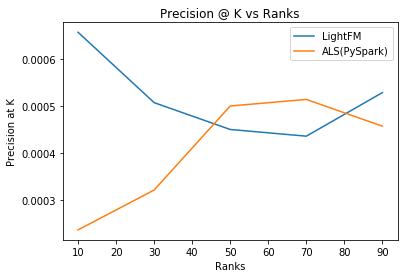

In [62]:
light_fm = [
    (10,0.0006571428584200995),
    (30,0.0005071428737470082),
    (50,0.00045000000723770684),
    (70,0.00043571429061038154),
    (90,0.000528571435383388),
]

pyspark = [
    (10, 0.000236),
    (30, 0.000321),
    (50, 0.000500),
    (70, 0.000514),
    (90, 0.000457)
]

plt.plot(list(list(zip(*light_fm))[0]), list(list(zip(*light_fm))[1]), label="LightFM")
plt.plot(list(list(zip(*pyspark))[0]), list(list(zip(*pyspark))[1]), label="ALS(PySpark)")

plt.title('Precision @ K vs Ranks')
plt.xlabel('Ranks')
plt.ylabel('Precision at K')
plt.legend(prop={'size': 10})

plt.savefig('PrecisionAtK_vs_Ranks.png', dpi=192, bbox_inches = "tight")